In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
# Read the csv file into a pandas DataFrame
data = pd.read_csv('/content/cumulative.csv')
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [4]:
# Related variables in the study
# Disposition [ koi-disposition]
# Distance Over Radius [koi_dor]
# Stellar Equilibirum Temperature [Koi-teq]
# Period [koi_period]
# Depth [koi_depth]
# Insolation/Earth Flux [ koi_insol]
# Stellar Effective Temperature [koi_steff]
# log10(stellar surface Gravity) [koi_slogg]
# Duration [koi_duration]
# Planetary Radius [koi_prad]
# Number of Transits [koi_num_transits]
# Stellar Radius [koi_srad]

In [9]:
data["koi_disposition"].unique()

array(['CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'], dtype=object)

In [10]:
data["koi_pdisposition"].unique()

array(['CANDIDATE', 'FALSE POSITIVE'], dtype=object)

In [11]:
c = list(data.columns)
c

['rowid',
 'kepid',
 'kepoi_name',
 'kepler_name',
 'koi_disposition',
 'koi_pdisposition',
 'koi_score',
 'koi_fpflag_nt',
 'koi_fpflag_ss',
 'koi_fpflag_co',
 'koi_fpflag_ec',
 'koi_period',
 'koi_period_err1',
 'koi_period_err2',
 'koi_time0bk',
 'koi_time0bk_err1',
 'koi_time0bk_err2',
 'koi_impact',
 'koi_impact_err1',
 'koi_impact_err2',
 'koi_duration',
 'koi_duration_err1',
 'koi_duration_err2',
 'koi_depth',
 'koi_depth_err1',
 'koi_depth_err2',
 'koi_prad',
 'koi_prad_err1',
 'koi_prad_err2',
 'koi_teq',
 'koi_teq_err1',
 'koi_teq_err2',
 'koi_insol',
 'koi_insol_err1',
 'koi_insol_err2',
 'koi_model_snr',
 'koi_tce_plnt_num',
 'koi_tce_delivname',
 'koi_steff',
 'koi_steff_err1',
 'koi_steff_err2',
 'koi_slogg',
 'koi_slogg_err1',
 'koi_slogg_err2',
 'koi_srad',
 'koi_srad_err1',
 'koi_srad_err2',
 'ra',
 'dec',
 'koi_kepmag']

In [12]:
# Drop all the unnecessary variables
data = data[['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition', 'koi_pdisposition',
            'koi_score', 'koi_period', 'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth',
            'koi_prad', 'koi_teq', 'koi_insol', 'koi_steff', 'koi_slogg', 'koi_srad', 'koi_kepmag']]

In [13]:
data.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509


In [14]:
# Create an empty column to store the result
data['result'] = ''

In [15]:
# Define the positive, negative, and false positive from disposition and pdisposition columns
for i in range(len(data)):
    if data.koi_disposition[i] == 'CONFIRMED' and data.koi_pdisposition[i] == 'CANDIDATE':
        data.result[i] = 'POSITIVE'
    elif data.koi_disposition[i] == 'CANDIDATE' and data.koi_pdisposition[i] == 'CANDIDATE':
        data.result[i] = 'POSITIVE'
    elif data.koi_disposition[i] == 'CONFIRMED' and data.koi_pdisposition[i] == 'FALSE POSITIVE':
        data.result[i] = 'FALSE POSITIVE'
    elif data.koi_disposition[i] == 'CANDIDATE' and data.koi_pdisposition[i] == 'FALSE POSITIVE':
        data.result[i] = 'FALSE POSITIVE'
    else:
        data.result[i] = 'NEGATIVE'

print(data['result'])

<ipython-input-15-04ed10da447a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.result[i] = 'POSITIVE'
<ipython-input-15-04ed10da447a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.result[i] = 'NEGATIVE'
<ipython-input-15-04ed10da447a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.result[i] = 'POSITIVE'
<ipython-input-15-04ed10da447a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

0       POSITIVE
1       POSITIVE
2       NEGATIVE
3       NEGATIVE
4       POSITIVE
          ...   
9559    NEGATIVE
9560    NEGATIVE
9561    POSITIVE
9562    NEGATIVE
9563    NEGATIVE
Name: result, Length: 9564, dtype: object


In [16]:
# Count the results
data['result'].value_counts()

NEGATIVE          5023
POSITIVE          4496
FALSE POSITIVE      45
Name: result, dtype: int64

In [17]:
# Factorize the results to Negative:[1], Positive:[0], and False Positive:[2]
data['res'], uniques = pd.factorize(data.result)

In [18]:
# Compare the counts with the result column
data['res'].value_counts()

1    5023
0    4496
2      45
Name: res, dtype: int64

In [19]:
# Check for total missing value in each column
data.isna().sum()

kepid                  0
kepoi_name             0
kepler_name         7270
koi_disposition        0
koi_pdisposition       0
koi_score           1510
koi_period             0
koi_time0bk            0
koi_impact           363
koi_duration           0
koi_depth            363
koi_prad             363
koi_teq              363
koi_insol            321
koi_steff            363
koi_slogg            363
koi_srad             363
koi_kepmag             1
result                 0
res                    0
dtype: int64

In [20]:
# Drop the rows with missing value in 'koi_prad', which has represent the key variables in the study
data = data.dropna(subset=['koi_prad'])

In [21]:
# Check for missing value again after dropping the missing value rows
data.isna().sum()

kepid                  0
kepoi_name             0
kepler_name         6908
koi_disposition        0
koi_pdisposition       0
koi_score           1206
koi_period             0
koi_time0bk            0
koi_impact             0
koi_duration           0
koi_depth              0
koi_prad               0
koi_teq                0
koi_insol              0
koi_steff              0
koi_slogg              0
koi_srad               0
koi_kepmag             1
result                 0
res                    0
dtype: int64

In [22]:
# Check the count of the result column after dropping the missing value rows
data['res'].value_counts()

1    4724
0    4433
2      44
Name: res, dtype: int64

In [25]:
pip install six


In [26]:
import six


In [27]:
import six

# Example usage of six
if six.PY2:
    print("Python 2.x")
elif six.PY3:
    print("Python 3.x")


Python 3.x


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import six  # Replace the import
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn import metrics

%matplotlib inline
plt.style.use('seaborn-white')


<ipython-input-30-faf153da0e63>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [31]:
# Use Pair Plot to visualize the correlation between the variables in the study
pairplot = data[['res', 'koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']]

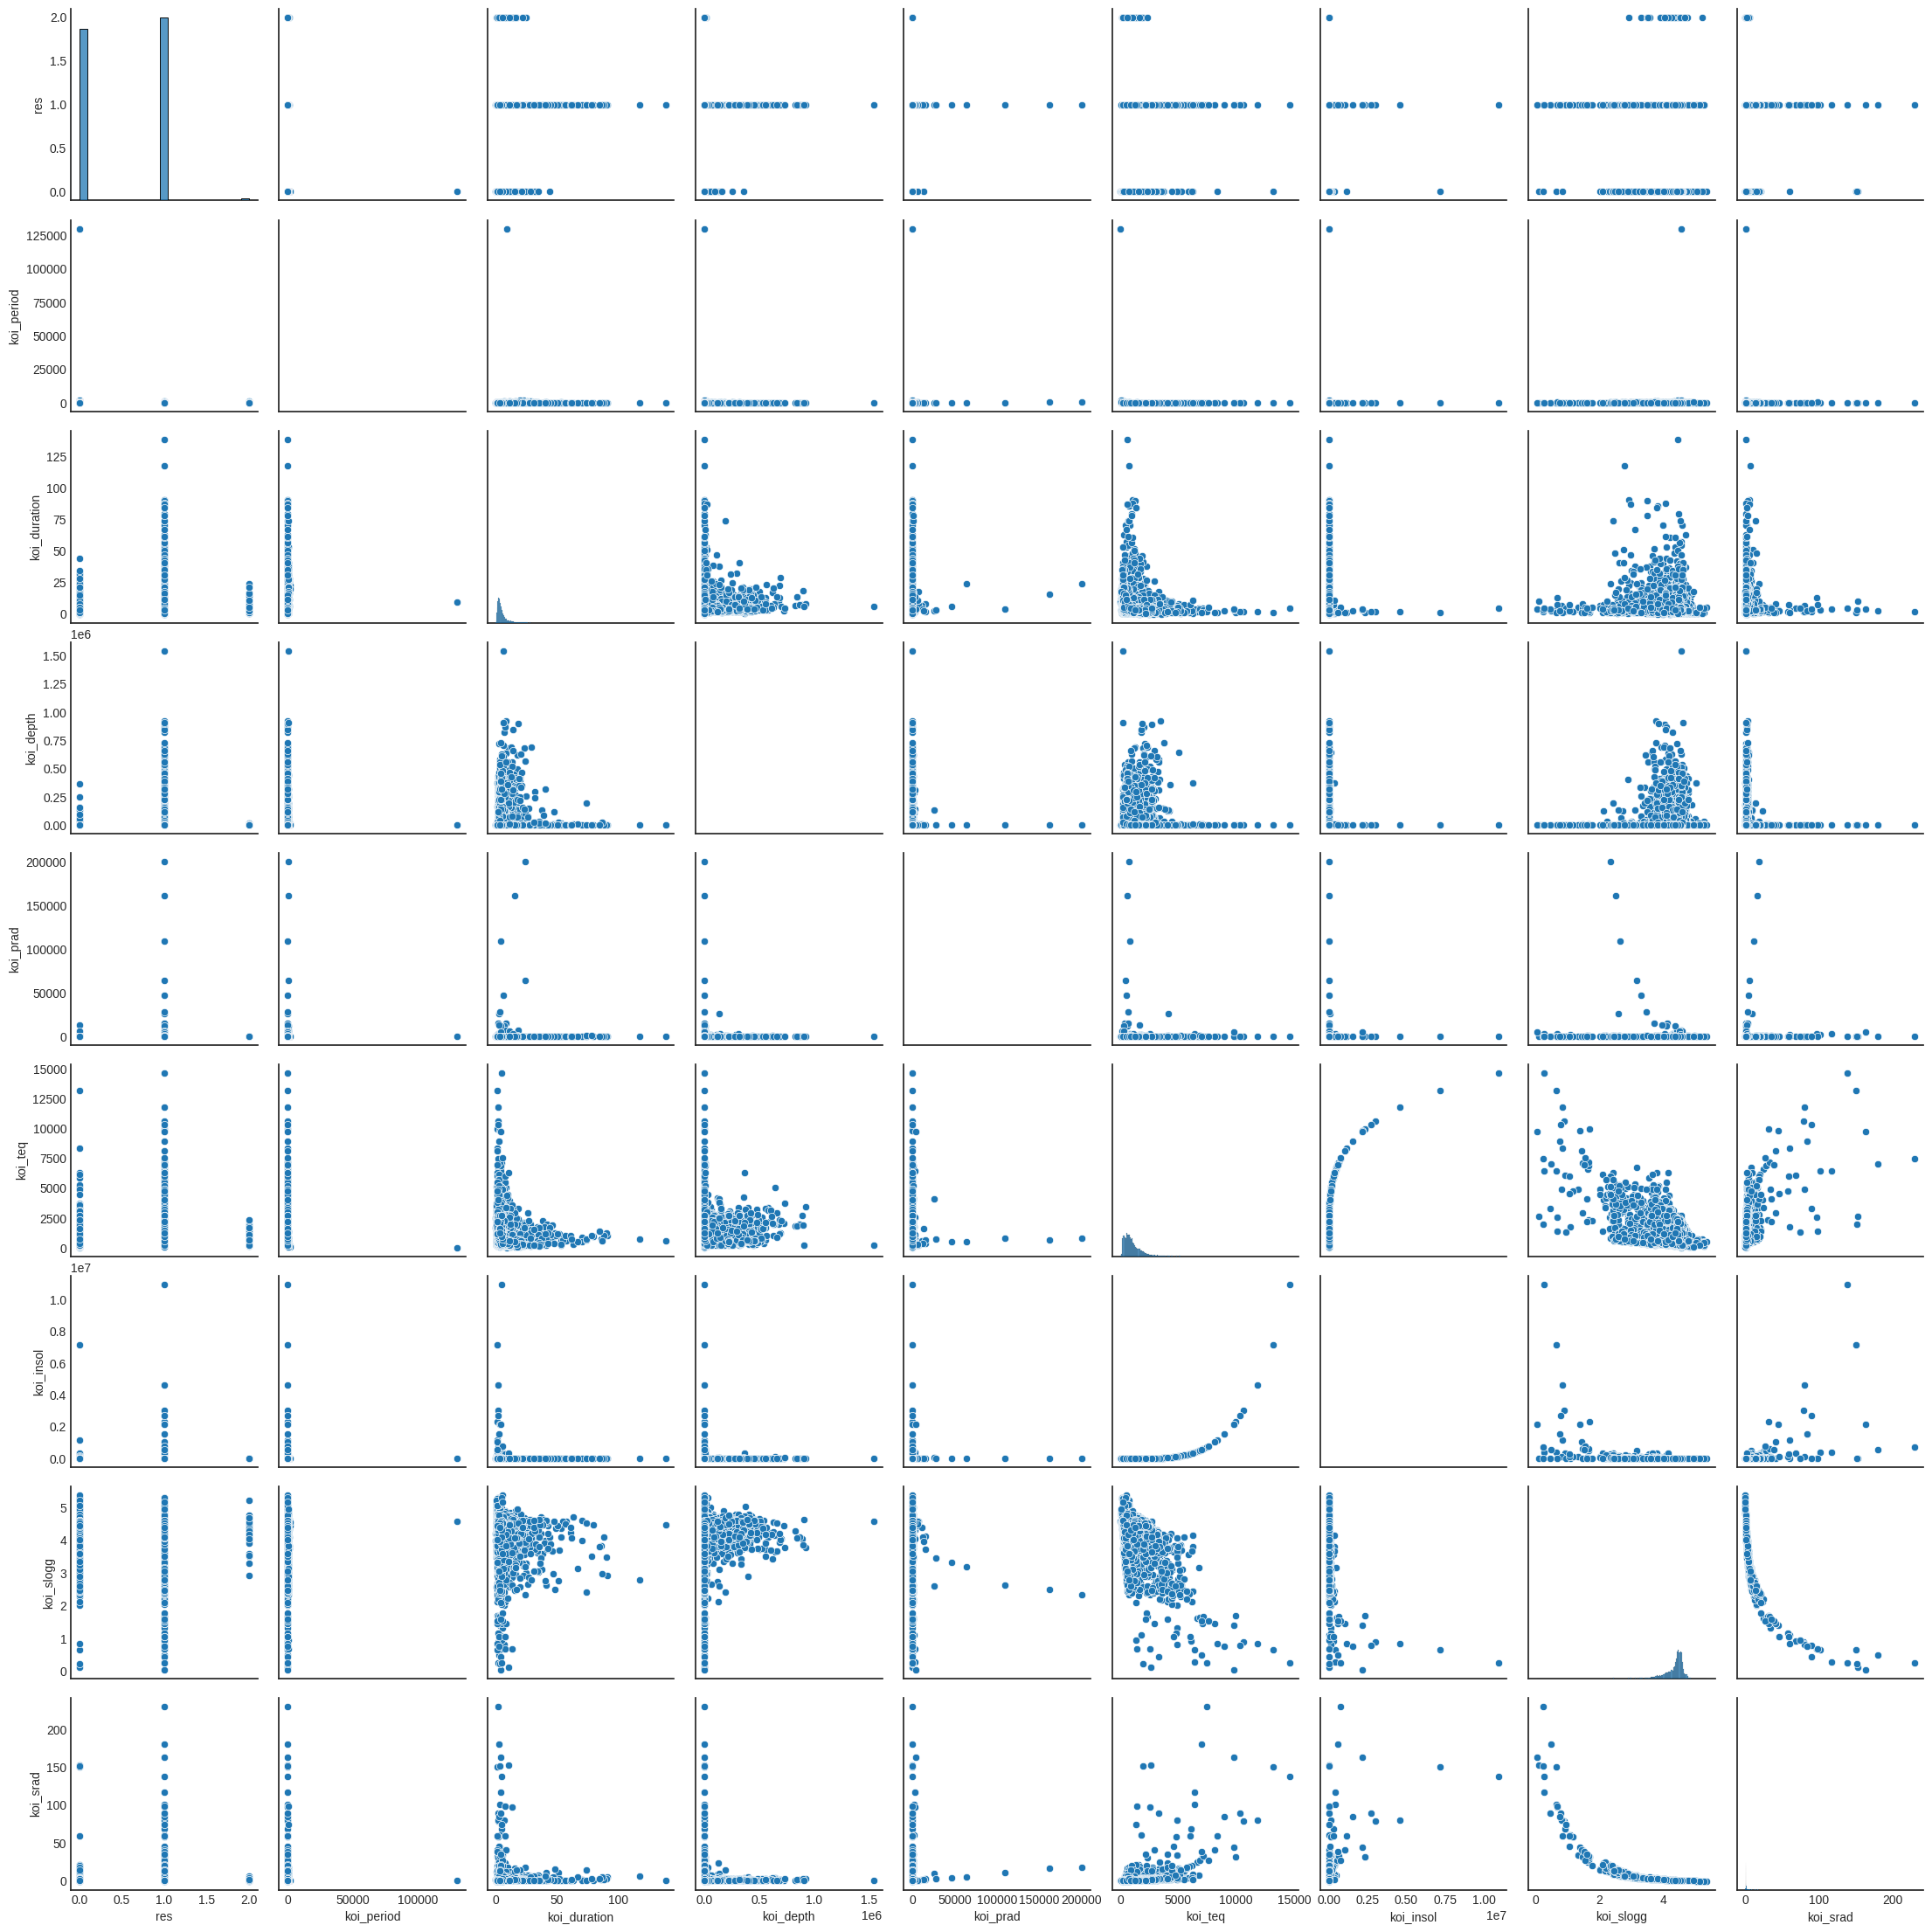

In [32]:
plot = sns.pairplot(pairplot)

In [35]:
# Define the independent variables (X) and dependent variable (y) for the tree model
X = data[['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
         'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']].values
y = data['res'].values


In [36]:
# Use train_test_split() function divide the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [37]:
# Decision Tree Regressor Model
regr = DecisionTreeRegressor(max_leaf_nodes=5)
result = regr.fit(X, y)

[Text(0.6, 0.9, 'x[3] <= 14.23\nsquared_error = 0.259\nsamples = 9201\nvalue = 0.523'),
 Text(0.4, 0.7, 'x[0] <= 1.895\nsquared_error = 0.249\nsamples = 6860\nvalue = 0.386'),
 Text(0.2, 0.5, 'squared_error = 0.19\nsamples = 1151\nvalue = 0.765'),
 Text(0.6, 0.5, 'x[0] <= 180.565\nsquared_error = 0.226\nsamples = 5709\nvalue = 0.31'),
 Text(0.4, 0.3, 'x[1] <= 14.499\nsquared_error = 0.197\nsamples = 4809\nvalue = 0.244'),
 Text(0.2, 0.1, 'squared_error = 0.187\nsamples = 4659\nvalue = 0.227'),
 Text(0.6, 0.1, 'squared_error = 0.181\nsamples = 150\nvalue = 0.787'),
 Text(0.8, 0.3, 'squared_error = 0.237\nsamples = 900\nvalue = 0.662'),
 Text(0.8, 0.7, 'squared_error = 0.074\nsamples = 2341\nvalue = 0.923')]

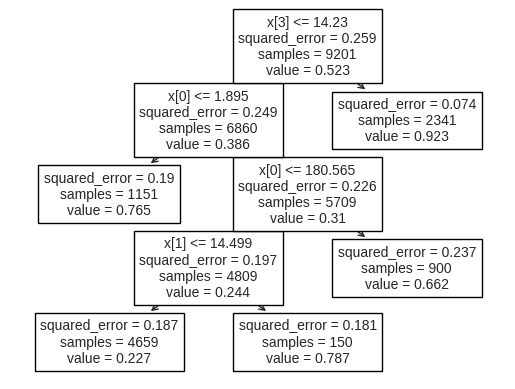

In [38]:
# Plot the Decision Trees diagram
tree.plot_tree(regr.fit(X, y))

In [39]:
y_pred = regr.predict(X)

In [40]:
# Print the predicted value compare to he actual
report = pd.DataFrame({'Actual':y, 'Predicted':y_pred})
print(report)

      Actual  Predicted
0          0   0.226873
1          0   0.226873
2          1   0.923110
3          1   0.923110
4          0   0.226873
...      ...        ...
9196       1   0.226873
9197       1   0.923110
9198       0   0.764553
9199       1   0.764553
9200       1   0.226873

[9201 rows x 2 columns]


In [41]:
# Print the Mean Error Measures
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))

Mean Absolute Error: 0.3120328248314145
Mean Squared Error: 0.16357329961607014
Root Mean Squared Error: 0.4044419607509465


Text(0, 0.5, 'Actual')

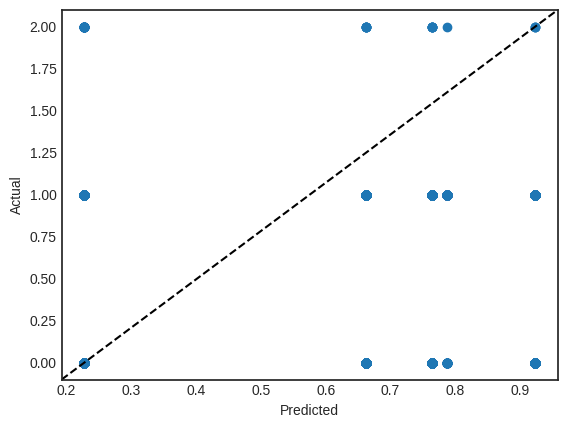

In [42]:
# Plot the prediction against the True
plt.scatter(y_pred, y, label='Prediction')
plt.plot([0,1], '--k', transform=plt.gca().transAxes)
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [43]:
# Decision Tree Classifier Model
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=5)

In [44]:
# Check the classification report for accuracy rate
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81      4433
           1       0.83      0.79      0.81      4724
           2       0.00      0.00      0.00        44

    accuracy                           0.81      9201
   macro avg       0.54      0.54      0.54      9201
weighted avg       0.81      0.81      0.81      9201



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# Print the Mean Error Measures
print('Mean Absolute Error:', metrics.mean_absolute_error(y, clf.predict(X)))
print('Mean Squared Error:', metrics.mean_squared_error(y, clf.predict(X)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, clf.predict(X))))

Mean Absolute Error: 0.19432670361917184
Mean Squared Error: 0.20149983697424192
Root Mean Squared Error: 0.4488873321605789


[Text(0.5133928571428571, 0.9166666666666666, 'x[3] <= 14.23\ngini = 0.504\nsamples = 9201\nvalue = [4433, 4724, 44]'),
 Text(0.2857142857142857, 0.75, 'x[0] <= 2.253\ngini = 0.476\nsamples = 6860\nvalue = [4250, 2569, 41]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= 2.096\ngini = 0.399\nsamples = 1304\nvalue = [350, 948, 6]'),
 Text(0.07142857142857142, 0.4166666666666667, 'x[5] <= 3124.67\ngini = 0.493\nsamples = 683\nvalue = [279, 398, 6]'),
 Text(0.03571428571428571, 0.25, 'x[4] <= 1247.5\ngini = 0.509\nsamples = 433\nvalue = [228, 200, 5]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.421\nsamples = 94\nvalue = [67, 25, 2]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.508\nsamples = 339\nvalue = [161, 175, 3]'),
 Text(0.10714285714285714, 0.25, 'x[2] <= 23.0\ngini = 0.331\nsamples = 250\nvalue = [51, 198, 1]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.494\nsamples = 9\nvalue = [5, 4, 0]'),
 Text(0.125, 0.0833333333333333

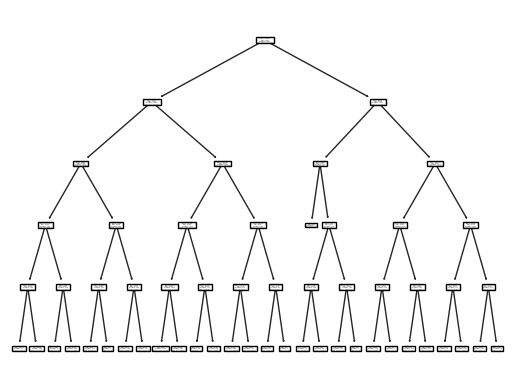

In [46]:
# Plot the decision tree diagram
tree.plot_tree(clf.fit(X, y))

In [47]:
# Compare the predicted results and actual results
cm = pd.DataFrame(confusion_matrix(y, clf.predict(X)).T, index=['Negative', 'Positive', 'False Positive'],
                 columns=['Negative', 'Positive', 'False Positive'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,Negative,Positive,False Positive
Predicted,,,
Negative,3700,978,33
Positive,733,3746,11
False Positive,0,0,0


In [50]:
#K Nearest Neighbour
# Dependencies for KNN model
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [51]:
# Spliting the data in to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [53]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance and fit it on the training data
X_scaler = StandardScaler().fit(X_train)

# Transform (scale) both the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


k: 1, Train/Test Score: 1.000/0.731
k: 3, Train/Test Score: 0.862/0.771
k: 5, Train/Test Score: 0.838/0.783
k: 7, Train/Test Score: 0.827/0.797
k: 9, Train/Test Score: 0.817/0.794
k: 11, Train/Test Score: 0.808/0.800
k: 13, Train/Test Score: 0.804/0.797
k: 15, Train/Test Score: 0.806/0.800
k: 17, Train/Test Score: 0.803/0.805
k: 19, Train/Test Score: 0.799/0.805


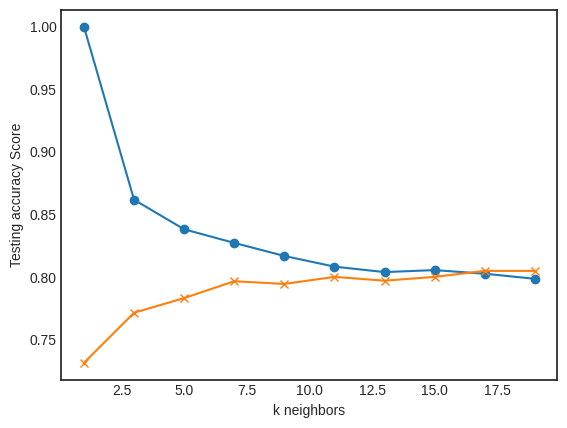

In [54]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")


plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [55]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.751


In [56]:
# Print the classifiation report checking the accuracy rate of the model
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1109
           1       0.78      0.73      0.75      1181
           2       0.00      0.00      0.00        11

    accuracy                           0.75      2301
   macro avg       0.50      0.50      0.50      2301
weighted avg       0.75      0.75      0.75      2301



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
#Logistic Regression
# Dependencies for Logistic Regression Model
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [58]:
# Drop the False Positive values in the data for only binary analysis
data_2 = data.loc[data.res < 2]
data_2.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_steff,koi_slogg,koi_srad,koi_kepmag,result,res
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,9.488036,170.538750,0.146,2.95750,615.8,2.26,793.0,93.59,5455.0,4.467,0.927,15.347,POSITIVE,0
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,54.418383,162.513840,0.586,4.50700,874.8,2.83,443.0,9.11,5455.0,4.467,0.927,15.347,POSITIVE,0
2,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638.0,39.30,5853.0,4.544,0.868,15.436,NEGATIVE,1
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395.0,891.96,5805.0,4.564,0.791,15.597,NEGATIVE,1
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406.0,926.16,6031.0,4.438,1.046,15.509,POSITIVE,0


In [60]:
# Create the dependent and independent variables
X_2 = data_2[['koi_period', 'koi_duration', 'koi_depth', 'koi_prad',
              'koi_teq', 'koi_insol', 'koi_slogg', 'koi_srad']].values
y_2 = data_2['res'].values


In [61]:
# Spliting the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, random_state=42, stratify=y_2)

In [62]:
# Logistic Regression Model
classifier = LogisticRegression()
classifier.fit(X2_train, y2_train)

LogisticRegression()

In [63]:
# Print the training score and testing score
print(f"Training Data Score: {classifier.score(X2_train, y2_train)}")
print(f"Testing Data Score: {classifier.score(X2_test, y2_test)}")

Training Data Score: 0.5159458278724334
Testing Data Score: 0.5157205240174673


In [64]:
# Check accuracy rate of the model in classification report
print(classification_report(y2_test, classifier.predict(X2_test)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1109
           1       0.52      1.00      0.68      1181

    accuracy                           0.52      2290
   macro avg       0.26      0.50      0.34      2290
weighted avg       0.27      0.52      0.35      2290



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
# Compare the predicted values to the test data set
predictions = classifier.predict(X2_test)
pd.DataFrame({"Prediction": predictions, "Actual": y2_test})

,Prediction,Actual
0,1,0
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
2285,1,1
2286,1,0
2287,1,0
2288,1,0


In [66]:
#Support Vector Machine
# Dependencies for SVM model
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [67]:
# Support Vector Machine Linear Classifier
model = SVC(kernel='linear')

In [68]:
# Fitting the data into the model
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [69]:
# Save the prediction by the test data
predictions = model.predict(X_test_scaled)

In [70]:
# Check accuracy rate of  the model
print(classification_report(y_test, predictions,
                           target_names=['Negative', 'Positive', 'False Positive']))

                precision    recall  f1-score   support

      Negative       0.72      0.86      0.79      1109
      Positive       0.84      0.70      0.76      1181
False Positive       0.00      0.00      0.00        11

      accuracy                           0.77      2301
     macro avg       0.52      0.52      0.52      2301
  weighted avg       0.78      0.77      0.77      2301



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
# Check the score of the dependent variable using the decision function
y_score = model.decision_function(X_train)
print(y_score)

[[ 0.66678834  2.3332119  -0.28014733]
 [ 2.33316531  0.6669279  -0.3328631 ]
 [ 0.66680729  2.33319318 -0.29643033]
 ...
 [ 0.66688945  2.33311114 -0.26646705]
 [ 0.66682506  2.3331753  -0.2759114 ]
 [ 0.66666774  2.33333226 -0.33060022]]


In [72]:
# Compare the predicted results to the training data
cm = confusion_matrix(y_train, model.predict(X_train_scaled))
cm_df = pd.DataFrame(cm.T, index=model.classes_, columns=model.classes_)
cm_df.index.name = 'Prediction'
cm_df.columns.name = 'True'
print(cm_df)

True           0     1   2
Prediction                
0           2867  1126  26
1            457  2417   7
2              0     0   0
